In [19]:
import torch
import matplotlib.pyplot as plt
from useful_functions_notebook_14to18 import *
from useful_functions_notebook_8to13 import variable_consistancy_check, mass_not_preserved_percentage_decrease, check_branch_length, analyze_data
from IPython.display import display, HTML
from IPython.display import display
display(HTML("<style>.container { width:70% !important; }</style>"))
transform = transforms.Resize((29, 10))
original = torch.load('data/dataset_distlognorm_massnorm.pt')

# T = 750

/Users/corneliusbencsik/anaconda3/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


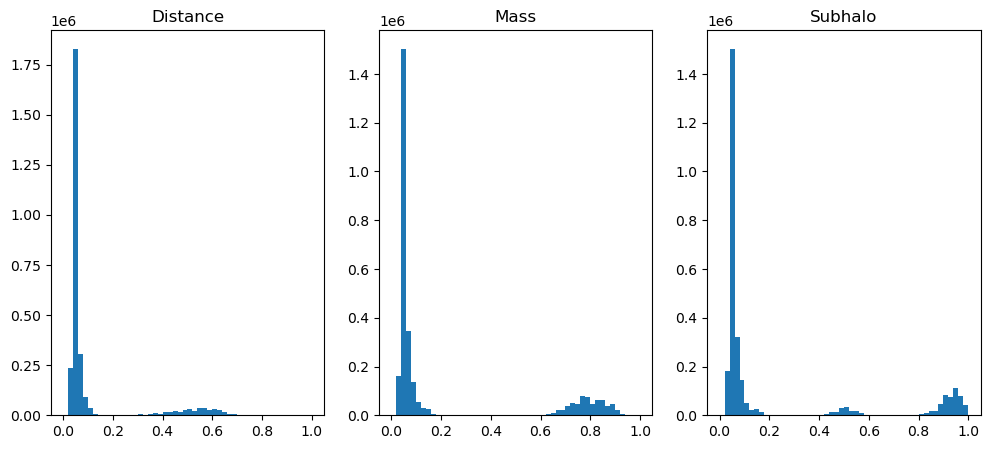

In [4]:

T750 = torch.load("../testing/T/generated_image_BILINEAR_T=750_linear.pt", map_location = "cpu")
T750 = transform(T750.to(dtype=torch.float))
T750 = normalize(T750, True, [0, 1, 2])


dist = T750[:, 0]
mass = T750[:, 1]
subh = T750[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [16]:
# dist
print("dist:")
lower_threshold = 0.15
upper_threshold = 0.25
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.2
upper_threshold = 0.56
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.2
upper_threshold = 0.4
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.6
upper_threshold = 0.7
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.15 and 0.25: 0.07%

mass:
Percentage of values between 0.2 and 0.56: 0.01%

subh:
Percentage of values between 0.2 and 0.4: 0.05%

Percentage of values between 0.6 and 0.7: 0.09%



In [17]:
T750 = transform_diffusion_image(T750, d_thresh = 0.25, m_tresh = 0.55, s_low = 0.35, s_high = 0.7)

T750_con, T750_incon = check_consistency(T750)



Percentage of consistant images = 88.61%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 0.00%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  83.32%
inconsistency due to zgap in branch 19.67%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 34, which is  2.99%
That corresponds to 0.34% of all images


Of all images, 0.00% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 9.49% have gap between branches inconsistency
Of all images, 2.24% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency


MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 172655
perc of occurences where mass is not preserved = 31.08% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 113560
perc of occurences where mass is not preserved = 20.45% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 32653
perc of occurences where mass is not preserved = 5.88% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 11650
perc of occurences where mass is not preserved = 2.10% vs. 0.32% in training data







DISTANCE:
total distance progentors = 342577 
number of occurences where distance increase (not preserved) = 156794
perc of occurences where mass increase (not preserved) = 45.77% vs. 49.67% in training data


total branches where the last halo distance to 

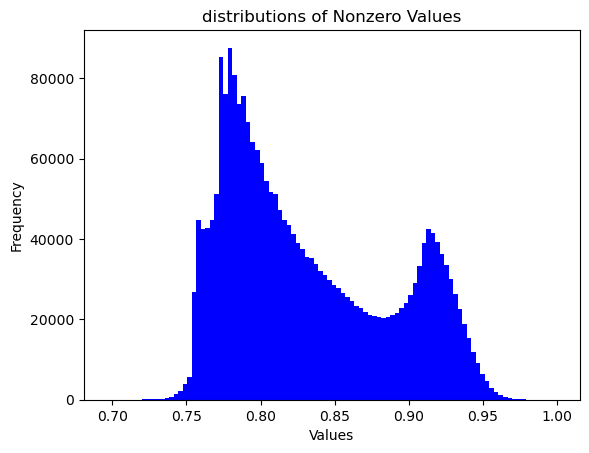

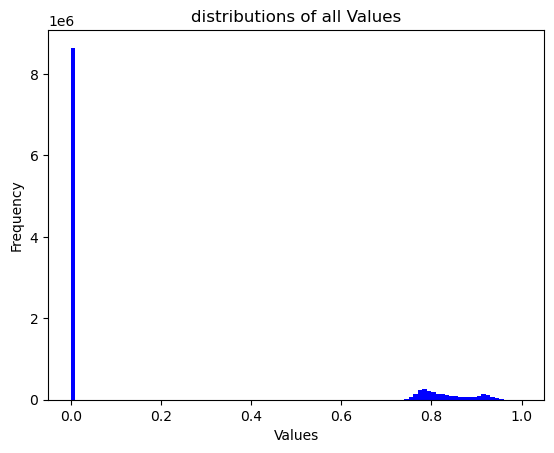

number of nonzero values = 2475374
Generated images:


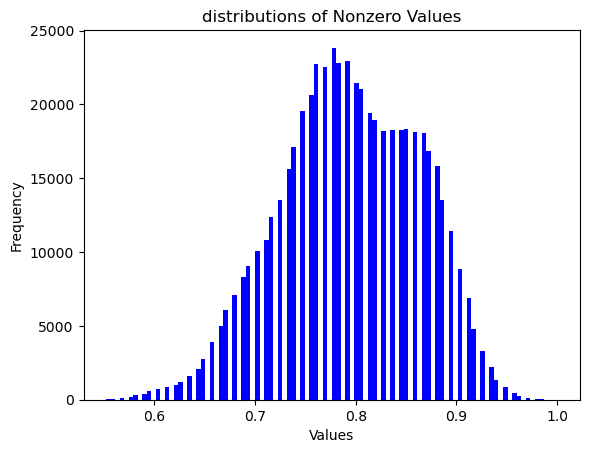

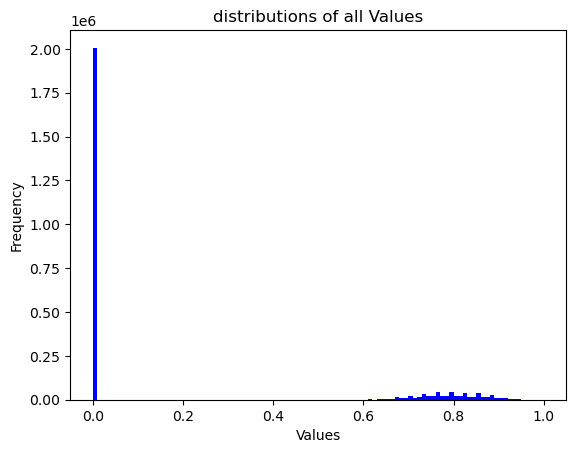

number of nonzero values = 563166


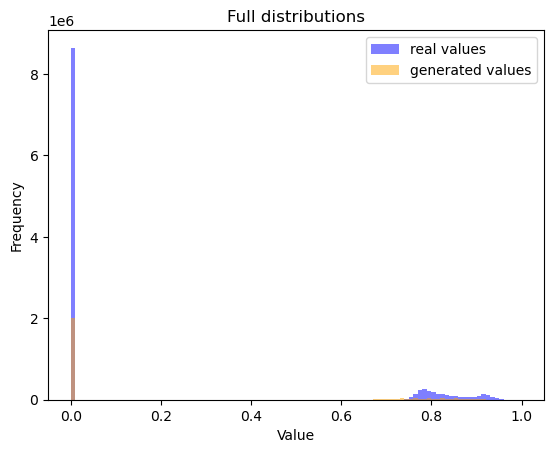

Full distribution:
KS Statistic: 0.0692731447277598
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0009:
The distributions are significantly different (reject H0), KS statistic 0.0693 > 0.0009


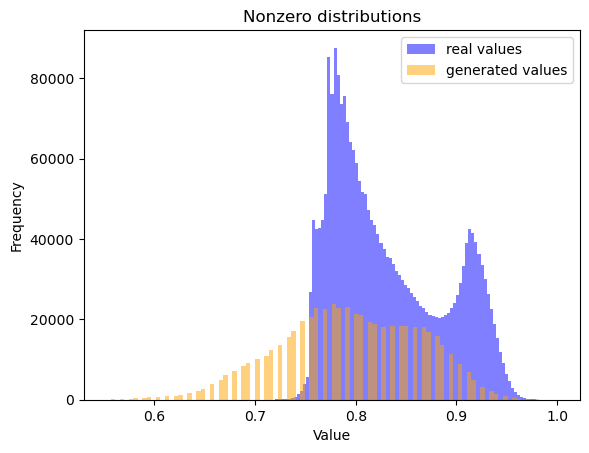

Nonzero distribution:
KS Statistic: 0.3011172786271874
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0020:
The distributions are significantly different (reject H0), KS statistic 0.3011 > 0.0020


(0.0692731447277598, 0.3011172786271874)

In [20]:
variable_consistancy_check(T750_con, False)
avg_branch = check_branch_length(T750_con)
ks_test(original, T750_con, dim = 1)

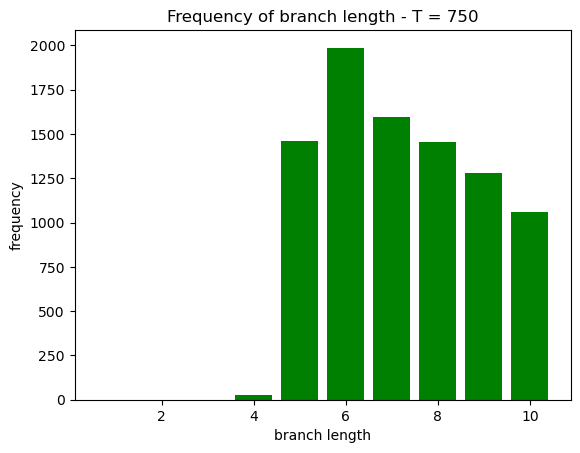

In [24]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [0, 0, 0, 25, 1458, 1987, 1595, 1455, 1280, 1061]

plt.bar(num_branches, length, color = "g")

# Add title and labels
plt.title('Frequency of branch length - T = 750')
plt.xlabel('branch length')
plt.ylabel('frequency')

# Show the plot
plt.show()

# T = 500

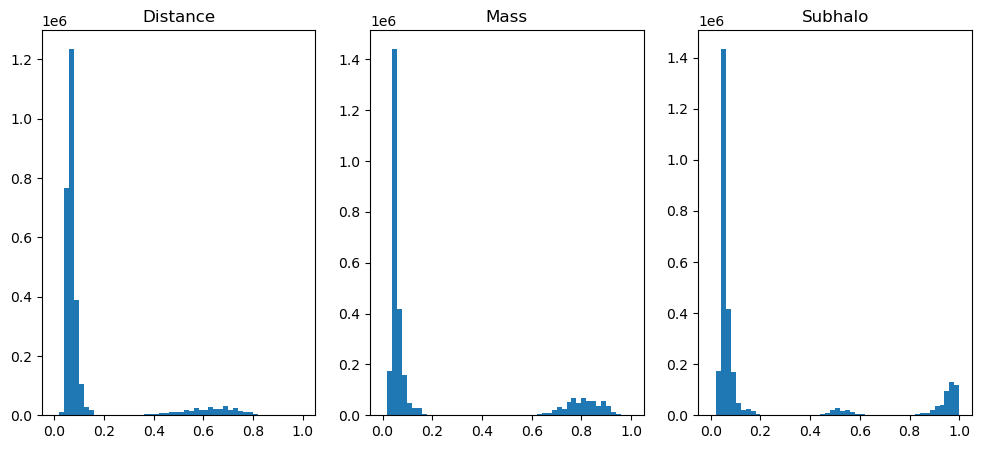

In [27]:

T500 = torch.load("../testing/T/generated_image_BILINEAR_T=500_linear.pt", map_location = "cpu")
T500 = transform(T500.to(dtype=torch.float))
T500 = normalize(T500, True, [0, 1, 2])


dist = T500[:, 0]
mass = T500[:, 1]
subh = T500[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [39]:
# dist
print("dist:")
lower_threshold = 0.2
upper_threshold = 0.3
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.2
upper_threshold = 0.57
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.25
upper_threshold = 0.4
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.65
upper_threshold = 0.75
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.2 and 0.3: 0.07%

mass:
Percentage of values between 0.2 and 0.57: 0.01%

subh:
Percentage of values between 0.25 and 0.4: 0.00%

Percentage of values between 0.65 and 0.75: 0.03%



In [40]:
T500 = transform_diffusion_image(T500, d_thresh = 0.3, m_tresh = 0.56, s_low = 0.35, s_high = 0.7)

T500_con, T500_incon = check_consistency(T500)



Percentage of consistant images = 86.18%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 0.07%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  86.98%
inconsistency due to zgap in branch 15.34%
inconsistency due to last descendant dont exist 0.00%

Number of images with two or more inconsistencies = 33, which is  2.39%
That corresponds to 0.33% of all images


Of all images, 0.01% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 12.02% have gap between branches inconsistency
Of all images, 2.12% have gap within branch inconsistency
Of all images, 0.00% have last descendant inconsistency


MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 156839
perc of occurences where mass is not preserved = 31.19% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 103817
perc of occurences where mass is not preserved = 20.65% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 30359
perc of occurences where mass is not preserved = 6.04% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 10908
perc of occurences where mass is not preserved = 2.17% vs. 0.32% in training data







DISTANCE:
total distance progentors = 295955 
number of occurences where distance increase (not preserved) = 131467
perc of occurences where mass increase (not preserved) = 44.42% vs. 49.67% in training data


total branches where the last halo distance to 

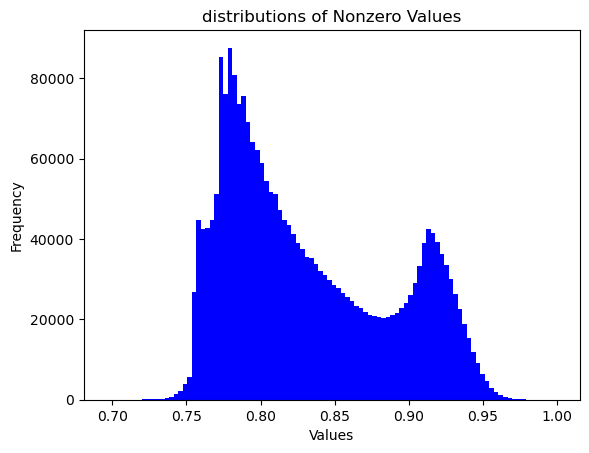

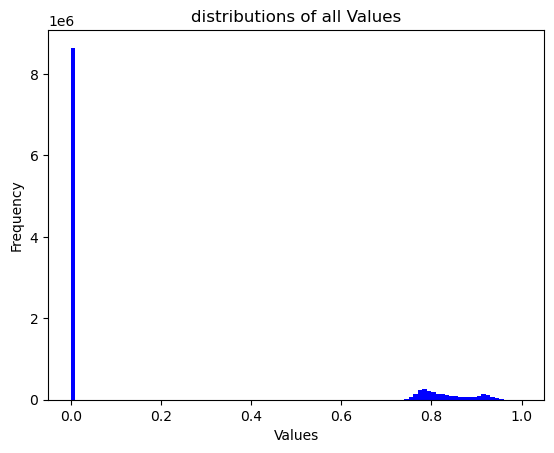

number of nonzero values = 2475374
Generated images:


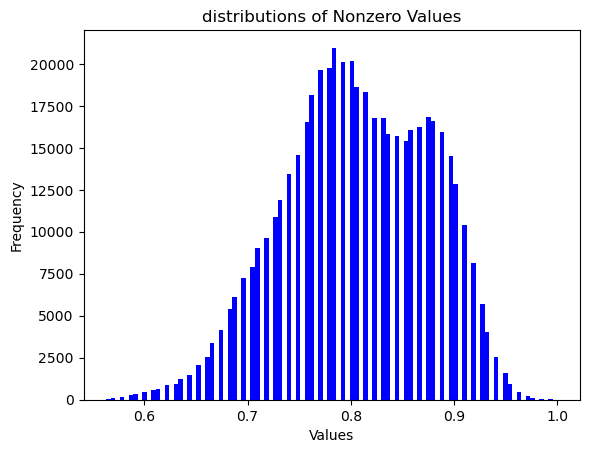

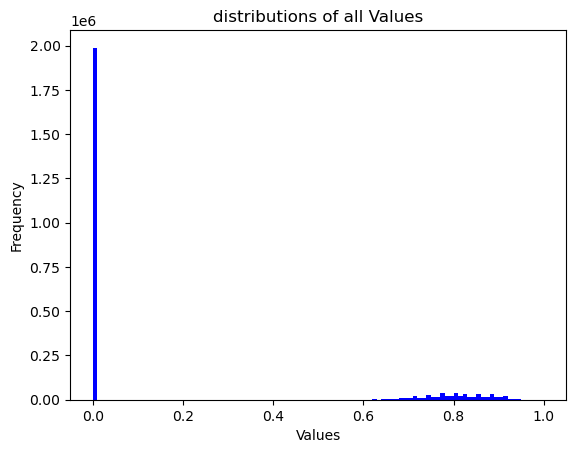

number of nonzero values = 511274


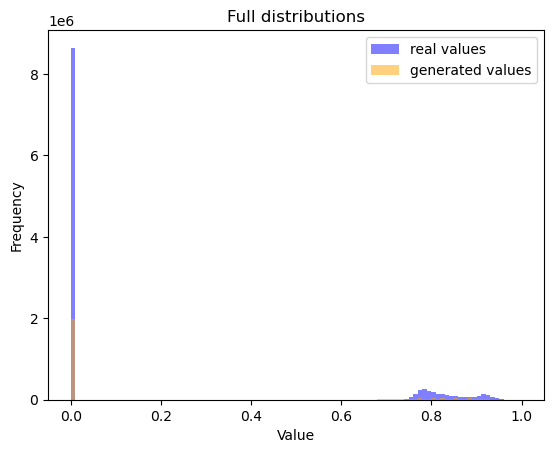

Full distribution:
KS Statistic: 0.06722478241416185
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0010:
The distributions are significantly different (reject H0), KS statistic 0.0672 > 0.0010


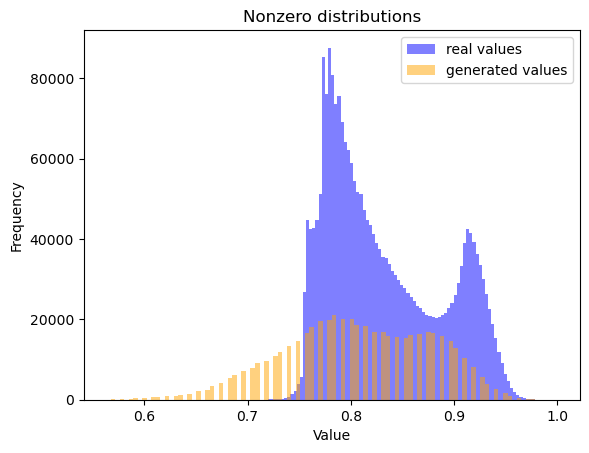

Nonzero distribution:
KS Statistic: 0.24194355910623172
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0021:
The distributions are significantly different (reject H0), KS statistic 0.2419 > 0.0021


(0.06722478241416185, 0.24194355910623172)

In [41]:
variable_consistancy_check(T500_con, False)
avg_branch = check_branch_length(T500_con)
ks_test(original, T500_con, dim = 1)

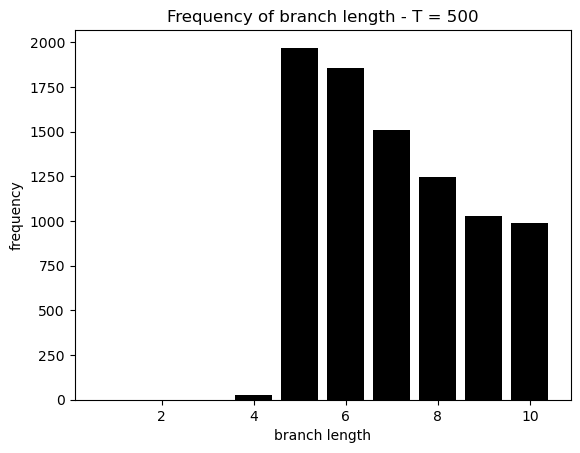

In [45]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [0, 0, 0, 28, 1969, 1857, 1507, 1244, 1027, 986]

plt.bar(num_branches, length, color = "black")

# Add title and labels
plt.title('Frequency of branch length - T = 500')
plt.xlabel('branch length')
plt.ylabel('frequency')

# Show the plot
plt.show()

# T = 250

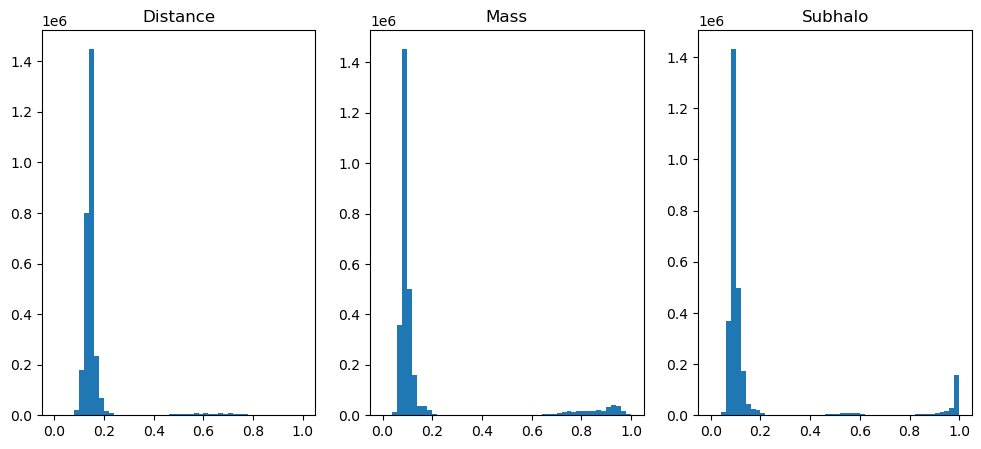

In [46]:

T250 = torch.load("../testing/T/generated_image_BILINEAR_T=250_linear.pt", map_location = "cpu")
T250 = transform(T250.to(dtype=torch.float))
T250 = normalize(T250, True, [0, 1, 2])


dist = T250[:, 0]
mass = T250[:, 1]
subh = T250[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [68]:
# dist
print("dist:")
lower_threshold = 0.25
upper_threshold = 0.35
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.3
upper_threshold = 0.55
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.35
upper_threshold = 0.4
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.65
upper_threshold = 0.75
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.25 and 0.35: 0.09%

mass:
Percentage of values between 0.3 and 0.55: 0.06%

subh:
Percentage of values between 0.35 and 0.4: 0.01%

Percentage of values between 0.65 and 0.75: 0.16%



In [69]:
T250 = transform_diffusion_image(T250, d_thresh = 0.3, m_tresh = 0.55, s_low = 0.375, s_high = 0.725)

T250_con, T250_incon = check_consistency(T250)



Percentage of consistant images = 67.89%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 5.70%
inconsistency due to distance not zero in main branch =  0.03%
inconsistency due to gap between branches =  32.76%
inconsistency due to zgap in branch 66.61%
inconsistency due to last descendant dont exist 19.74%

Number of images with two or more inconsistencies = 663, which is  20.65%
That corresponds to 6.63% of all images


Of all images, 1.83% have zero inconsistency
Of all images, 0.01% have distance main branch inconsistency
Of all images, 10.52% have gap between branches inconsistency
Of all images, 21.39% have gap within branch inconsistency
Of all images, 6.34% have last descendant inconsistency


MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 64438
perc of occurences where mass is not preserved = 29.01% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 43860
perc of occurences where mass is not preserved = 19.75% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 10224
perc of occurences where mass is not preserved = 4.60% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 3711
perc of occurences where mass is not preserved = 1.67% vs. 0.32% in training data







DISTANCE:
total distance progentors = 78011 
number of occurences where distance increase (not preserved) = 28619
perc of occurences where mass increase (not preserved) = 36.69% vs. 49.67% in training data


total branches where the last halo distance to main 

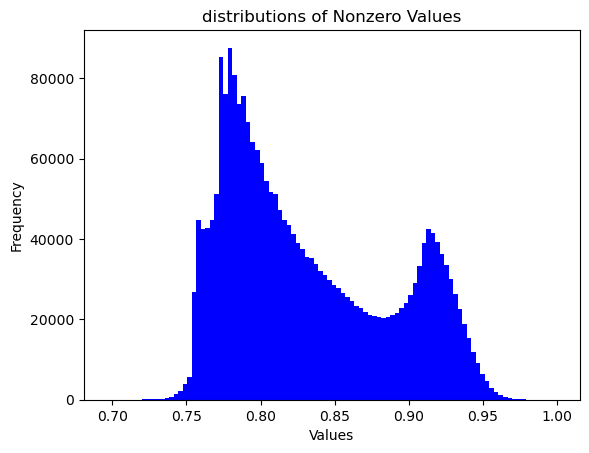

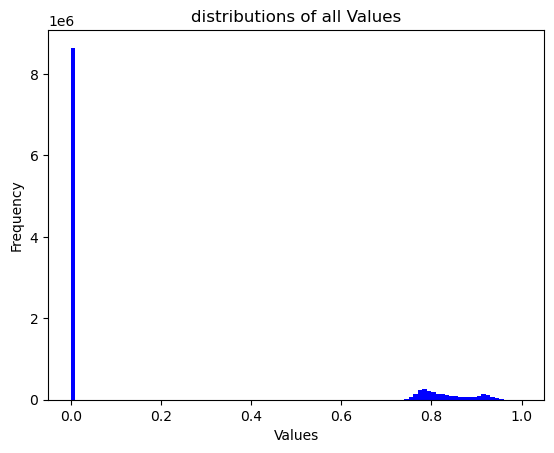

number of nonzero values = 2475374
Generated images:


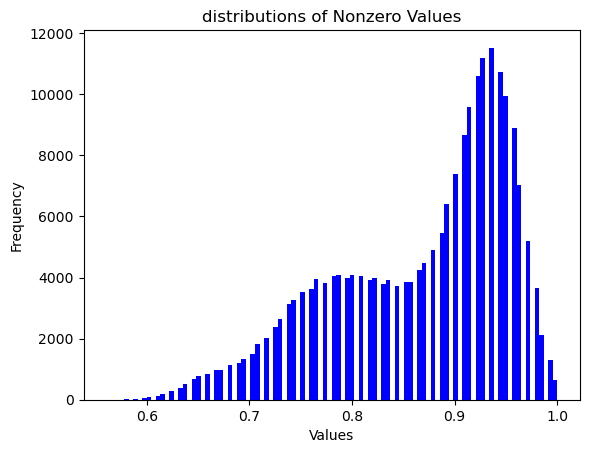

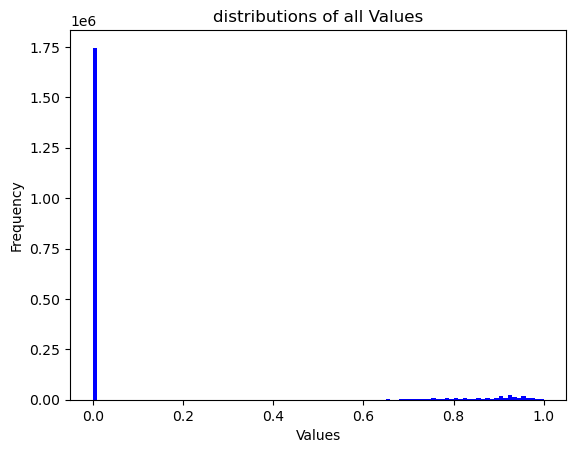

number of nonzero values = 222588


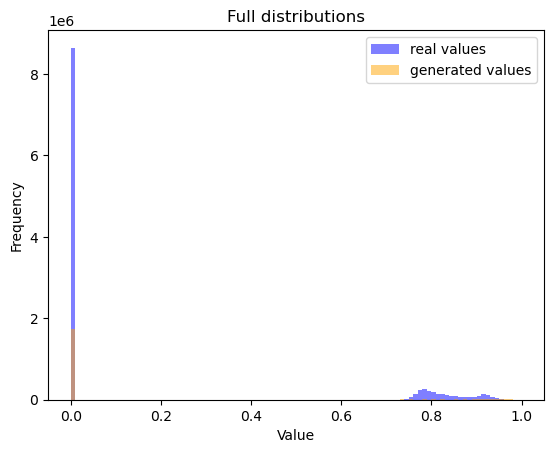

Full distribution:
KS Statistic: 0.12369301755134376
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0011:
The distributions are significantly different (reject H0), KS statistic 0.1237 > 0.0011


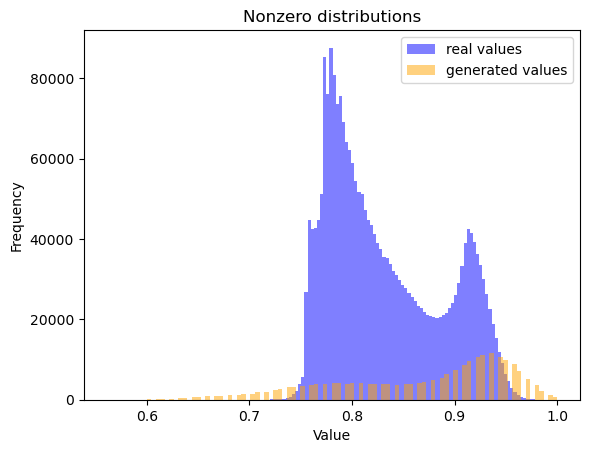

Nonzero distribution:
KS Statistic: 0.3141936370547742
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0030:
The distributions are significantly different (reject H0), KS statistic 0.3142 > 0.0030


(0.12369301755134376, 0.3141936370547742)

In [70]:
variable_consistancy_check(T250_con, False)
avg_branch = check_branch_length(T250_con)
ks_test(original, T250_con, dim = 1)

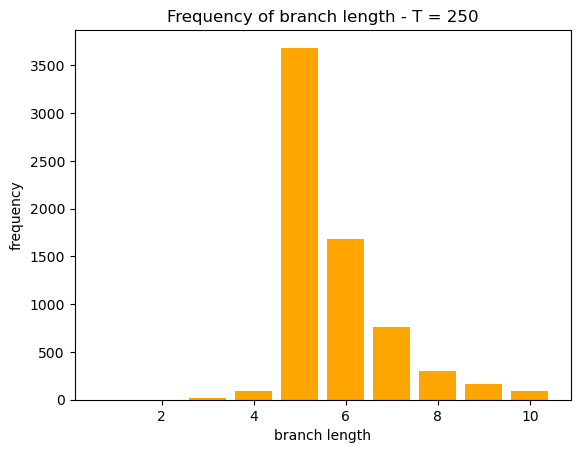

In [75]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [1, 2, 13, 94, 3685, 1678, 758, 299, 169, 90]

plt.bar(num_branches, length, color = "orange")

# Add title and labels
plt.title('Frequency of branch length - T = 250')
plt.xlabel('branch length')
plt.ylabel('frequency')

# Show the plot
plt.show()

# T = 100

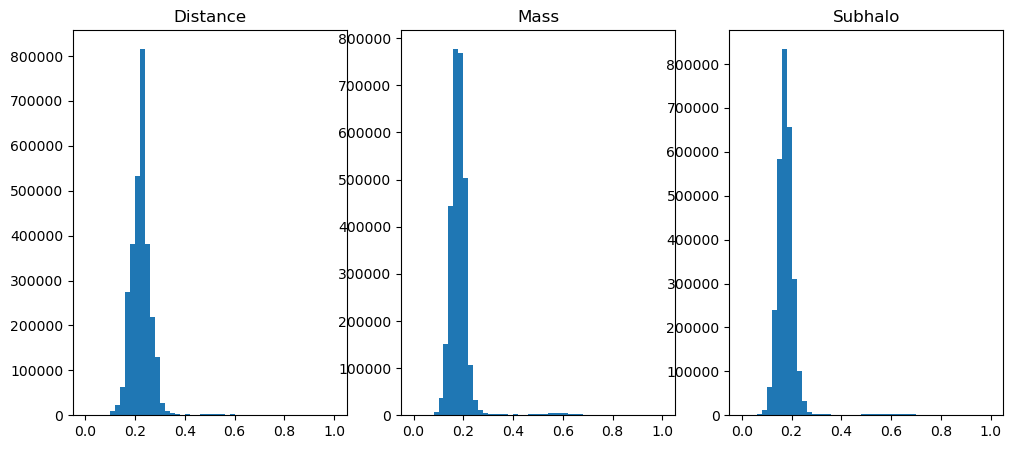

In [116]:

T100 = torch.load("../testing/T/generated_image_BILINEAR_T=100_linear.pt", map_location = "cpu")
T100 = transform(T100.to(dtype=torch.float))
T100 = normalize(T100, True, [0, 1, 2])


dist = T100[:, 0]
mass = T100[:, 1]
subh = T100[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [127]:
# dist
print("dist:")
lower_threshold = 0.40
upper_threshold = 0.43
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.4
upper_threshold = 0.45
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.39
upper_threshold = 0.43
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.8
upper_threshold = 0.999
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.4 and 0.43: 0.09%

mass:
Percentage of values between 0.4 and 0.45: 0.11%

subh:
Percentage of values between 0.39 and 0.43: 0.10%

Percentage of values between 0.8 and 0.999: 0.03%



In [128]:
T100 = transform_diffusion_image(T100, d_thresh = 0.4, m_tresh = 0.4, s_low = 0.4, s_high = 0.77)

T100_con, T100_incon = check_consistency(T100)



Percentage of consistant images = 5.55%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 42.17%
inconsistency due to distance not zero in main branch =  0.35%
inconsistency due to gap between branches =  56.64%
inconsistency due to zgap in branch 38.28%
inconsistency due to last descendant dont exist 62.89%

Number of images with two or more inconsistencies = 6302, which is  66.72%
That corresponds to 63.02% of all images


Of all images, 39.83% have zero inconsistency
Of all images, 0.33% have distance main branch inconsistency
Of all images, 53.50% have gap between branches inconsistency
Of all images, 36.16% have gap within branch inconsistency
Of all images, 59.40% have last descendant inconsistency


MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 191
perc of occurences where mass is not preserved = 20.32% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 172
perc of occurences where mass is not preserved = 18.30% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 113
perc of occurences where mass is not preserved = 12.02% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 44
perc of occurences where mass is not preserved = 4.68% vs. 0.32% in training data







DISTANCE:
total distance progentors = 26 
number of occurences where distance increase (not preserved) = 2
perc of occurences where mass increase (not preserved) = 7.69% vs. 49.67% in training data


total branches where the last halo distance to main branche is not 

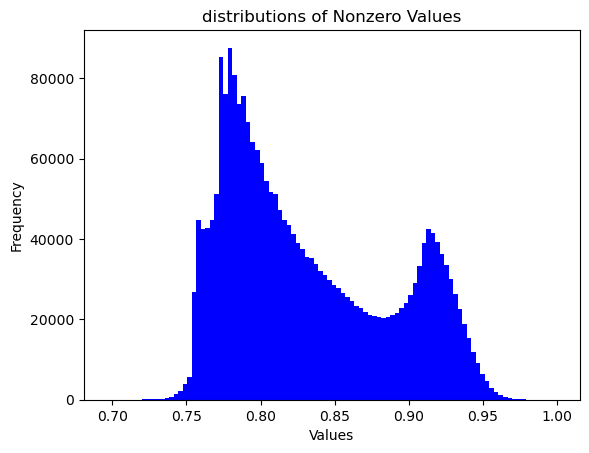

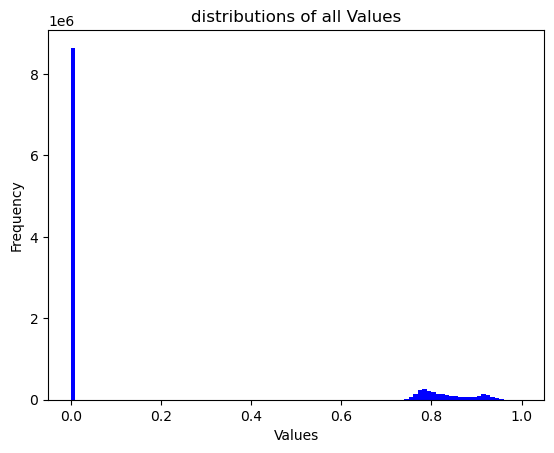

number of nonzero values = 2475374
Generated images:


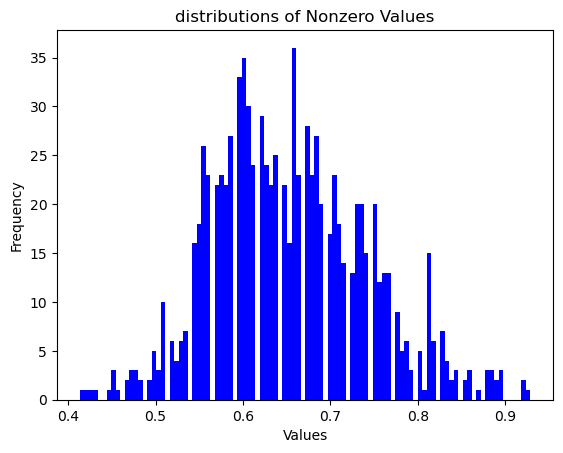

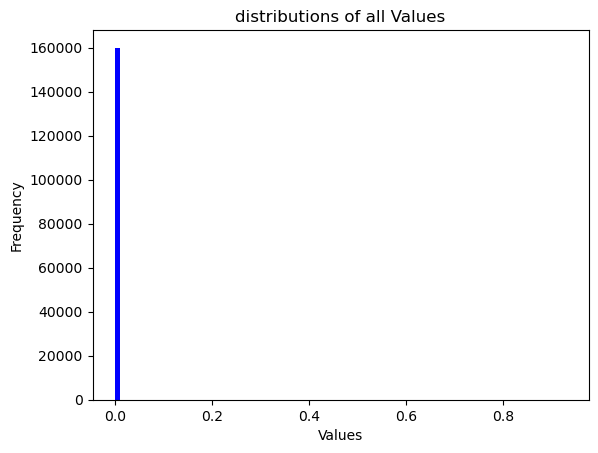

number of nonzero values = 940


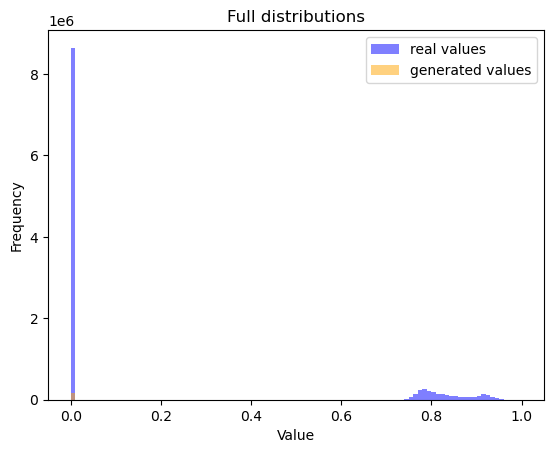

Full distribution:
KS Statistic: 0.2215382195192679
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0034:
The distributions are significantly different (reject H0), KS statistic 0.2215 > 0.0034


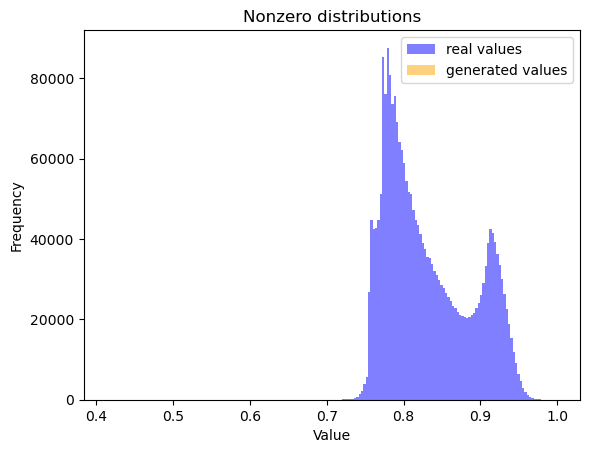

Nonzero distribution:
KS Statistic: 0.873741431103581
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0443:
The distributions are significantly different (reject H0), KS statistic 0.8737 > 0.0443


(0.2215382195192679, 0.873741431103581)

In [130]:
variable_consistancy_check(T100_con, False)
avg_branch = check_branch_length(T100_con)
ks_test(original, T100_con, dim = 1)

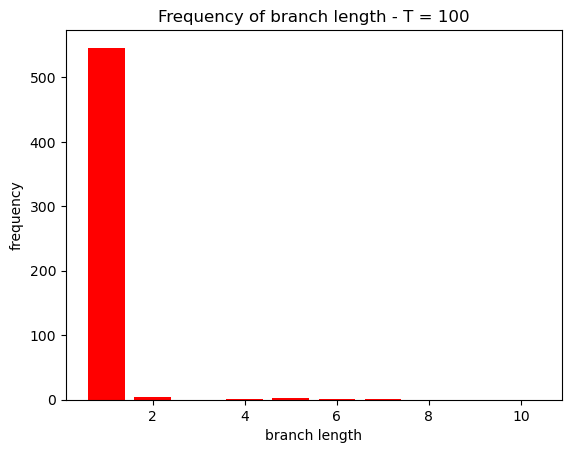

In [145]:
num_branches = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
length = [546, 4, 0, 1, 2, 1, 1, 0, 0, 0]

plt.bar(num_branches, length, color = "red")

# Add title and labels
plt.title('Frequency of branch length - T = 100')
plt.xlabel('branch length')
plt.ylabel('frequency')

# Show the plot
plt.show()

# results and sampling speed

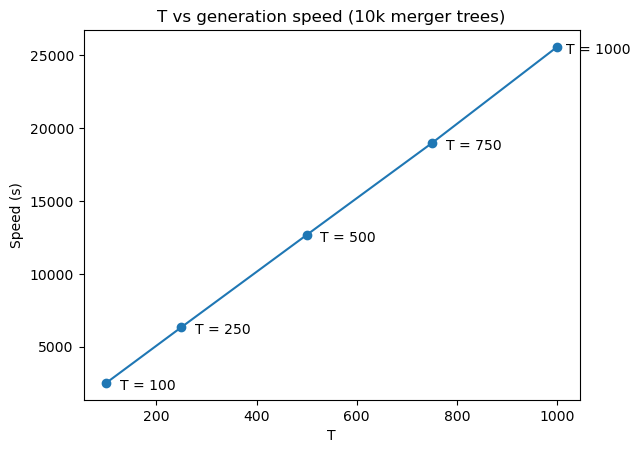

In [179]:
Ts = [100, 250, 500, 750, 1000]
speed = [2513.73, 6335.99, 12666.47, 18971.44, 25573.96]

# Plot
plt.plot(Ts, speed, marker='o', linestyle='-')

for i, txt in enumerate(Ts):
    plt.annotate(f"T = {txt}", (Ts[i], speed[i]), textcoords="offset points", xytext=(30,-5), ha='center')


# Labels and title
plt.xlabel('T')
plt.ylabel('Speed (s)')
plt.title('T vs generation speed (10k merger trees)')

# Show plot
plt.show()

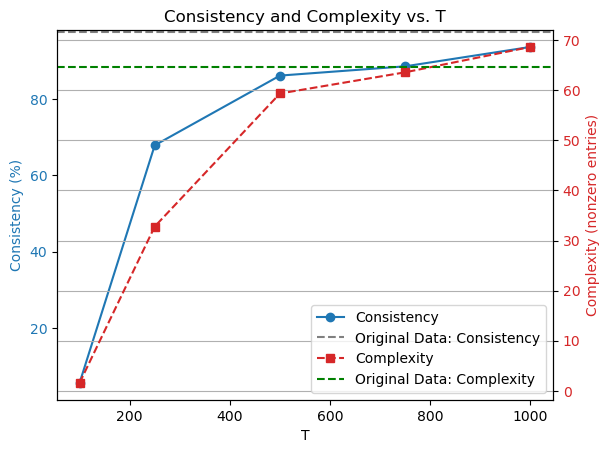

In [186]:
Ts = [100, 250, 500, 750, 1000]
consistency = [5.55, 67.89, 86.18, 88.61, 93.70]
complexity = [1.59, 32.79, 59.33, 63.56, 68.62]

# Plot consistency and complexity
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('T')
ax1.set_ylabel('Consistency (%)', color=color)
ax1.plot(Ts, consistency, color=color, marker='o', linestyle='-', label='Consistency')
ax1.axhline(y=97.51, color='gray', linestyle='--', label='Original Data: Consistency')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Complexity (nonzero entries)', color=color)
ax2.plot(Ts, complexity, color=color, marker='s', linestyle='--', label='Complexity')
ax2.axhline(y=64.55, color='green', linestyle='--', label='Original Data: Complexity')
ax2.tick_params(axis='y', labelcolor=color)

# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

# Title
plt.title('Consistency and Complexity vs. T')

# Show plot
plt.grid(True)
plt.show()

# T = 5000

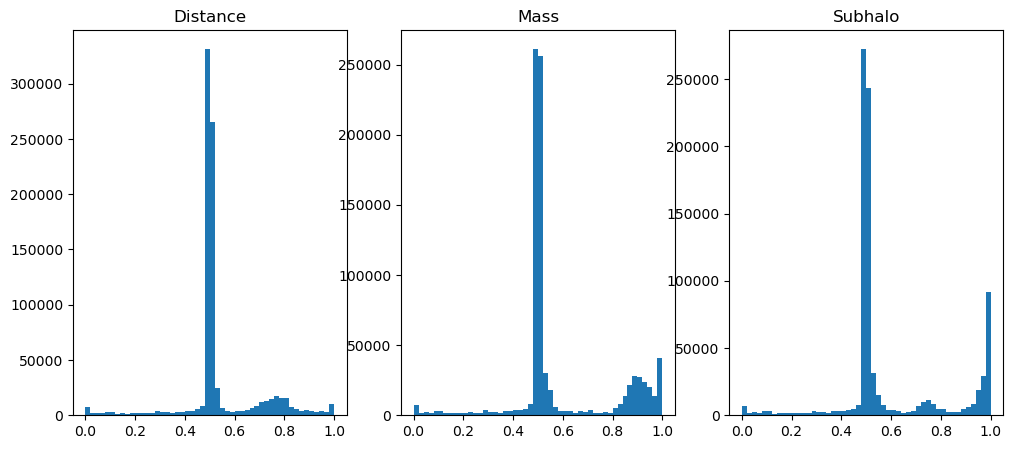

In [188]:

T5000 = torch.load("../testing/T/generated_image_epochs =200_BILINEAR_T=5000_linear.pt", map_location = "cpu")
T5000 = transform(T5000.to(dtype=torch.float))
T5000 = normalize(T5000, True, [0, 1, 2])


dist = T5000[:, 0]
mass = T5000[:, 1]
subh = T5000[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()

In [192]:
# dist
print("dist:")
lower_threshold = 0.6
upper_threshold = 0.62
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.6
upper_threshold = 0.7
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.65
upper_threshold = 0.68
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.82
upper_threshold = 0.85
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.6 and 0.62: 0.42%

mass:
Percentage of values between 0.6 and 0.7: 1.47%

subh:
Percentage of values between 0.65 and 0.68: 0.44%

Percentage of values between 0.82 and 0.85: 0.42%



In [193]:
T5000 = transform_diffusion_image(T5000, d_thresh = 0.6, m_tresh = 0.6, s_low = 0.65, s_high = 0.825)

T5000_con, T5000_incon = check_consistency(T5000)



Percentage of consistant images = 72.00%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 70.36%
inconsistency due to distance not zero in main branch =  62.14%
inconsistency due to gap between branches =  31.67%
inconsistency due to zgap in branch 70.60%
inconsistency due to last descendant dont exist 58.33%

Number of images with two or more inconsistencies = 565, which is  67.26%
That corresponds to 18.83% of all images


Of all images, 19.70% have zero inconsistency
Of all images, 17.40% have distance main branch inconsistency
Of all images, 8.87% have gap between branches inconsistency
Of all images, 19.77% have gap within branch inconsistency
Of all images, 16.33% have last descendant inconsistency


In [203]:
T5000 = torch.load("../testing/T/generated_image_epochs =200_BILINEAR_T=5000_linear.pt", map_location = "cpu")
T5000 = transform(T5000.to(dtype=torch.float))
T5000 = normalize(T5000, True, [0, 1, 2])
T5000 = transform_diffusion_image(T5000, d_thresh = 0.6, m_tresh = 0.6, s_low = 0.65, s_high = 0.825)
T5000[:, 0, :, 0] = 0.0
T5000_con, T5000_incon = check_consistency(T5000)



Percentage of consistant images = 72.00%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 70.36%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  31.67%
inconsistency due to zgap in branch 70.60%
inconsistency due to last descendant dont exist 58.33%

Number of images with two or more inconsistencies = 563, which is  67.02%
That corresponds to 18.77% of all images


Of all images, 19.70% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 8.87% have gap between branches inconsistency
Of all images, 19.77% have gap within branch inconsistency
Of all images, 16.33% have last descendant inconsistency


MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 42415
perc of occurences where mass is not preserved = 30.28% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 18570
perc of occurences where mass is not preserved = 13.26% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 3204
perc of occurences where mass is not preserved = 2.29% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 14
perc of occurences where mass is not preserved = 0.01% vs. 0.32% in training data







DISTANCE:
total distance progentors = 88820 
number of occurences where distance increase (not preserved) = 40253
perc of occurences where mass increase (not preserved) = 45.32% vs. 49.67% in training data


total branches where the last halo distance to main bra

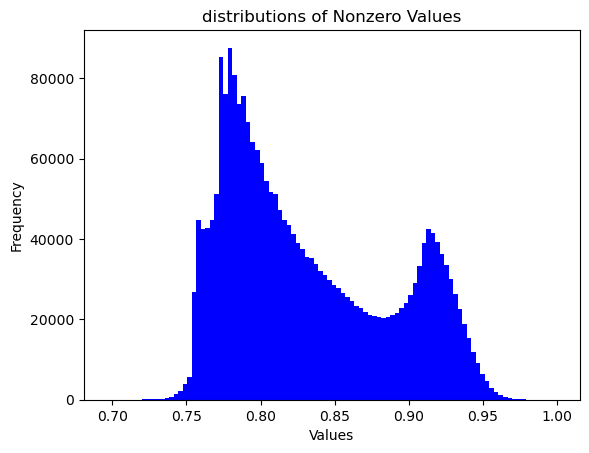

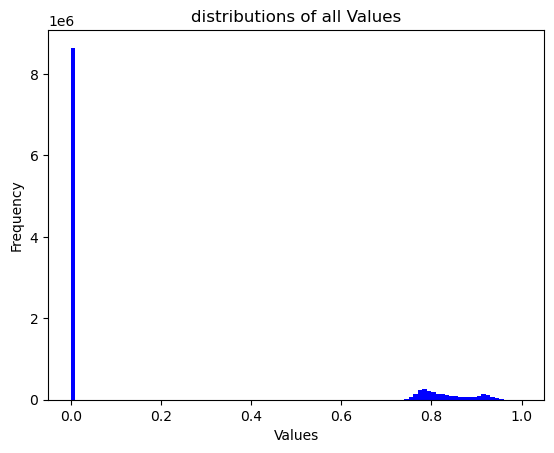

number of nonzero values = 2475374
Generated images:


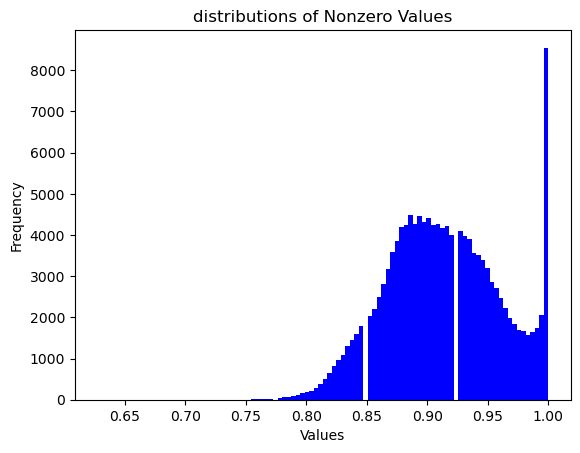

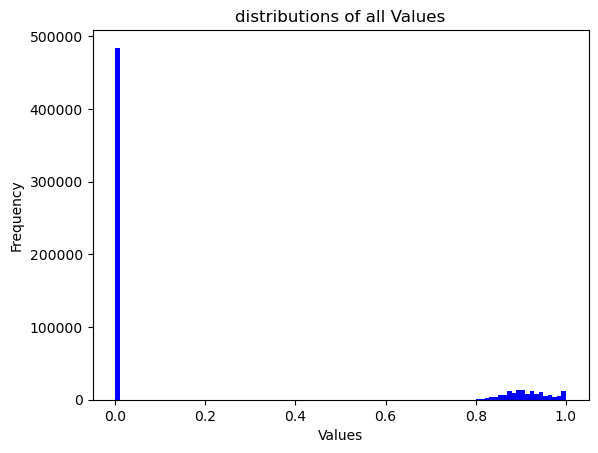

number of nonzero values = 141870


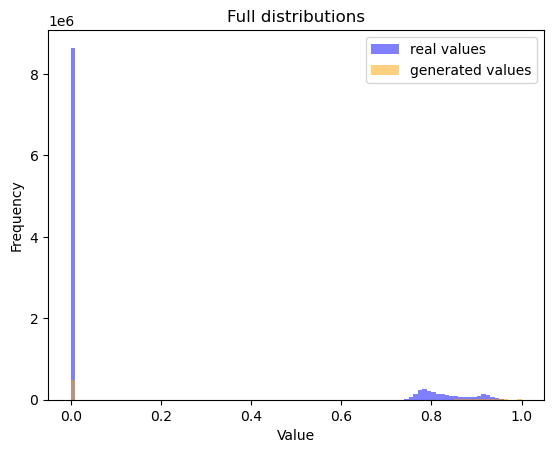

Full distribution:
KS Statistic: 0.13223761480032092
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0018:
The distributions are significantly different (reject H0), KS statistic 0.1322 > 0.0018


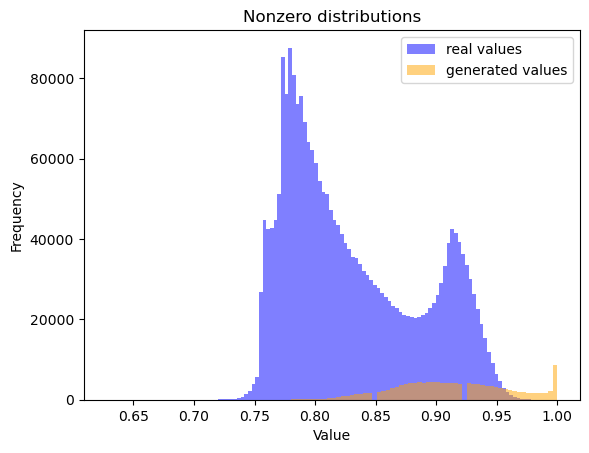

Nonzero distribution:
KS Statistic: 0.5780418210422017
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0037:
The distributions are significantly different (reject H0), KS statistic 0.5780 > 0.0037


(0.13223761480032092, 0.5780418210422017)

In [204]:
variable_consistancy_check(T5000_con, False)
avg_branch = check_branch_length(T5000_con)
ks_test(original, T5000_con, dim = 1)

In [205]:
T5000 = torch.load("../testing/T/generated_image_epochs =200_BILINEAR_T=5000_linear.pt", map_location = "cpu")
T5000 = transform(T5000.to(dtype=torch.float))
# Assuming you have a tensor named 'tensor'
# Convert tensor to 1D if it's not already
tensor_1d = T5000.view(-1)

# Get unique values and their counts
unique_values, counts = torch.unique(torch.round(tensor_1d, decimals = 0), return_counts=True)

# Print unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")




Value: 0.0, Count: 14909
Value: 1.0, Count: 1168
Value: 2.0, Count: 1176
Value: 3.0, Count: 1153
Value: 4.0, Count: 2620
Value: 5.0, Count: 727
Value: 6.0, Count: 695
Value: 7.0, Count: 1980
Value: 8.0, Count: 657
Value: 9.0, Count: 1464
Value: 10.0, Count: 702
Value: 11.0, Count: 1122
Value: 12.0, Count: 1553
Value: 13.0, Count: 1704
Value: 14.0, Count: 740
Value: 15.0, Count: 2317
Value: 16.0, Count: 722
Value: 17.0, Count: 1161
Value: 18.0, Count: 759
Value: 19.0, Count: 722
Value: 20.0, Count: 2080
Value: 21.0, Count: 816
Value: 22.0, Count: 3045
Value: 23.0, Count: 796
Value: 24.0, Count: 1306
Value: 25.0, Count: 2834
Value: 26.0, Count: 4859
Value: 27.0, Count: 341
Value: 28.0, Count: 1535
Value: 29.0, Count: 1721
Value: 30.0, Count: 811
Value: 31.0, Count: 1394
Value: 32.0, Count: 380
Value: 33.0, Count: 1178
Value: 34.0, Count: 758
Value: 35.0, Count: 348
Value: 36.0, Count: 1566
Value: 37.0, Count: 1192
Value: 38.0, Count: 772
Value: 39.0, Count: 396
Value: 40.0, Count: 1828
V

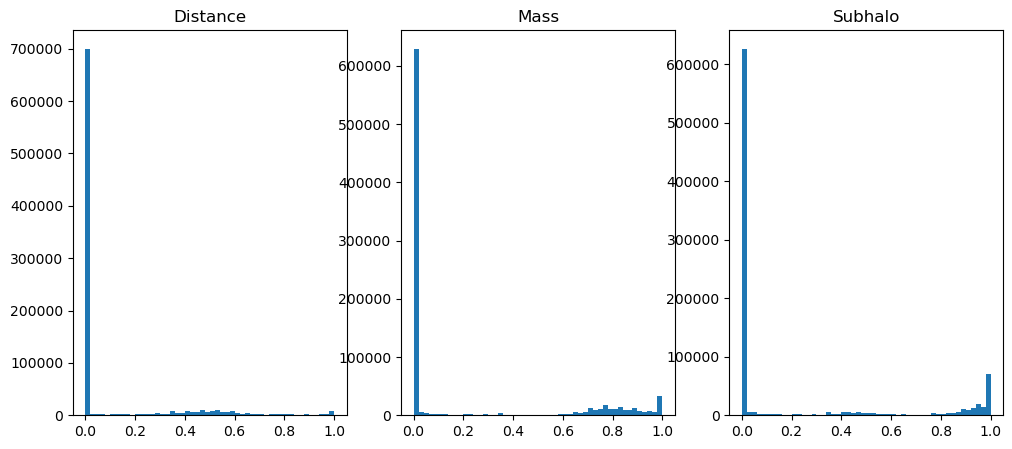

In [207]:
threshold = 138
T5000[T5000 < threshold] = threshold

T5000 = normalize(T5000, True, [0, 1, 2])

dist = T5000[:, 0]
mass = T5000[:, 1]
subh = T5000[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()


In [215]:
# dist
print("dist:")
lower_threshold = 0.15
upper_threshold = 0.25
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.45
upper_threshold = 0.55
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.3
upper_threshold = 0.4
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.65
upper_threshold = 0.75
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.15 and 0.25: 1.16%

mass:
Percentage of values between 0.45 and 0.55: 0.55%

subh:
Percentage of values between 0.3 and 0.4: 1.38%

Percentage of values between 0.65 and 0.75: 0.63%



In [216]:
T5000 = transform_diffusion_image(T5000, d_thresh = 0.6, m_tresh = 0.6, s_low = 0.65, s_high = 0.825)

T5000_con, T5000_incon = check_consistency(T5000)



Percentage of consistant images = 0.03%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 99.37%
inconsistency due to distance not zero in main branch =  14.10%
inconsistency due to gap between branches =  72.26%
inconsistency due to zgap in branch 77.96%
inconsistency due to last descendant dont exist 13.34%

Number of images with two or more inconsistencies = 2856, which is  95.23%
That corresponds to 95.20% of all images


Of all images, 99.33% have zero inconsistency
Of all images, 14.10% have distance main branch inconsistency
Of all images, 72.23% have gap between branches inconsistency
Of all images, 77.93% have gap within branch inconsistency
Of all images, 13.33% have last descendant inconsistency
